tau1  = 533.3333333333334
tau2  = 483.38368580060416


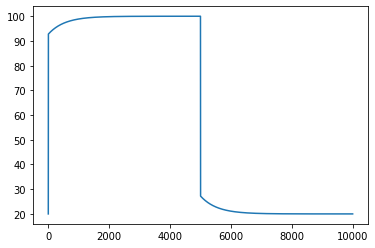

In [4]:
import matplotlib.pyplot as plt
import numpy as np

Tamb = 20
Tdelta1 = 80
Tdelta2 = 0
dt = 0.1
lmbda = 0.9
# Server mass [kg]
M = 8
# Overall specific heat [J/(kg*K)]
cp_eff = 400
# Specific heat capacity of air [J/(kg*K)]
# https://www.engineeringtoolbox.com/air-specific-heat-capacity-d_705.html
cp_air = 1000
# Overall effective heat transfer coefficient [J/(s*m²*K)]
# https://www.engineeringtoolbox.com/convective-heat-transfer-d_430.html
h = 40
# Server surface area [m²]
A = 0.15
# Average airflow rate through server [kg/s]
q_dot = 0.005 # [m³/s]
rho_air = 1.324 # [kg/m³]
m_dot = q_dot * rho_air
# Time constants [s]
tau1 = M*cp_eff/(h*A)
tau2 = M*cp_eff/(m_dot*cp_air)
print(f'tau1  = {tau1}')
print(f'tau2  = {tau2}')
assert(tau1>=tau2>=0)
assert(tau1+dt>tau2)

dt = 0.01
span = 1000000
Tex = [Tamb]
Teff = [Tamb]
for i in range(1, span):
    if i == 1:
        Tdelta = Tdelta1
    if i == span/2:
        Tdelta = Tdelta2
    Teff_old = Teff[i-1]

    Teff += [tau1/(tau1 + dt)*Teff_old + dt/(tau1 + dt)*(Tamb + (1 - lmbda)*Tdelta)]
    Tex += [Tamb + Tdelta + tau2/(tau1 + dt)*(Teff_old - Tamb - (1 - lmbda)*Tdelta)]
plt.plot(np.arange(0, span*dt, dt), Tex)
plt.show()